<a href="https://colab.research.google.com/github/rightchel/mirea-hi/blob/main/(%D0%91%D0%B5%D0%BB%D0%BE%D0%B7%D1%83%D0%B1%D0%BE%D0%B2_%D0%A3%D0%98%D0%91%D0%9E_07_22)_%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

Датасет **covid_data** (cd.csv) — данные о показателях заболеваемости за каждый день в различных регионах 187 стран

In [ ]:
covid_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/cd.csv')

Команда `display` в Python, особенно в контексте работы с библиотеками для анализа данных, такими как `IPython` или `Jupyter Notebook`, используется для отображения объектов, таких как датафреймы, графики и другие данные, в более удобочитаемом формате.

### Основные особенности `display`:

1. **Читаемость**: Позволяет визуально представлять данные в табличной форме (например, DataFrame из библиотеки `pandas`), что значительно более удобно, чем вывод в стандартном виде.

2. **Поддержка различных форматов**: Умеет отображать не только таблицы, но и графики, изображения и HTML.

3. **Интерактивность**: В Jupyter Notebook может предоставлять возможность интерактивного взаимодействия с данными, например, позволяет пользователям просматривать большие таблицы с прокруткой.


In [ ]:
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Мы будем работать со следующими столбцами:

* date — дата наблюдения;
* province/state — наименование провинции/штата;
* country — наименование страны;
* confirmed — общее число зафиксированных случаев на указанный день;
* deaths — общее число зафиксированных смертей на указанный день;
* recovered — общее число выздоровлений на указанный день.

country_vaccinations — данные о процессе вакцинирования людей в 221 стране мира

In [ ]:
vaccinations_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/cv.csv')
vaccinations_data = vaccinations_data[
        ['country', 'date', 'total_vaccinations',
         'people_vaccinated', 'people_vaccinated_per_hundred',
         'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
         'daily_vaccinations', 'vaccines']
    ]

In [ ]:
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Данная таблица содержит следующие столбцы:

* country — наименование страны;
* date — дата наблюдения;
* total_vaccinations — общее число введённых вакцин в стране на указанный день;
* people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
* people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как people_vaccinated/population*100);
* people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
* people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как people_fully_vaccinated/population*100);
* daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
* vaccines — комбинации вакцин, используемые в стране.

В таблице covid_data данные о заболеваемости представлены для каждого региона (штата) страны за каждый день.

В таблице vaccinations_data параметры вакцинирования отображены для всех стран на каждый день, без учёта регионов.

В данных много пропусков, а также неверно введённых значений. Например, для США (United States) и Великобритании (United Kingdom) в большинстве записей таблицы covid_data число выздоровевших людей равно 0.

Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.

Давайте **объединим таблицы**. Для этого необходимо учесть следующее:

* В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.

* В таблицах не совпадает число стран, а иногда и их названия.

* При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако сейчас это не важно.

* Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.

# Предобработка данных

В таблице **covid_data**:

Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [ ]:
# Группируем данные по столбцам 'date' и 'country'
covid_data = covid_data.groupby(
        ['date', 'country'],
        as_index=False  # Не используем индексы из группировки в качестве индексов датафрейма
    )[['confirmed', 'deaths', 'recovered']].sum()  # Выбираем столбцы для операции и суммируем их значения

Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [ ]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff().

Команда diff() в следующем коде используется для вычисления разницы между текущим и предыдущим значением в группе данных. В данном контексте она применяется к столбцам confirmed, deaths и recovered для каждой страны.

Вот что происходит:

Группировка по странам: Данные группируются по столбцу country.


Вычисление разницы: Метод diff() вычисляет, сколько новых случаев (подтвержденных, смертей и выздоровлений) произошло за день, вычитая значения предыдущего дня из текущего для каждой страны.


Сохранение результатов: Полученные значения записываются в новые столбцы daily_confirmed, daily_deaths и daily_recovered, которые представляют собой количество новых случаев за день для каждой страны.


Таким образом, diff() позволяет отслеживать ежедневные изменения в поведении инфекций и смертей по странам.

In [ ]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

Итоговый вид таблицы covid_data:

In [ ]:
covid_data.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


С помощью метода merge() объединим таблицы covid_data и vaccinations_data по столбцам date и country так, чтобы в результирующую таблицу попали только наблюдения за период представленный в таблице covid_data. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения запишем в переменную covid_df.

In [ ]:
# 'date' в виде строки преобразована в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# Находим минимальную и максимальную даты
start_date = covid_data['date'].min()
end_date = covid_data['date'].max()

# Форматируем вывод
period = f"{start_date.year}-{start_date.month:02d}-{start_date.day:02d}-{end_date.year}-{end_date.month:02d}-{end_date.day:02d}"
print(period)

# Фильтруем данные по датам
covid_data_filtered = covid_data[(covid_data['date'] >= start_date) & (covid_data['date'] <= end_date)]
vaccinations_data_filtered = vaccinations_data[(vaccinations_data['date'] >= start_date) & (vaccinations_data['date'] <= end_date)]

# Объединяем таблицы по столбцам date и country
covid_df = pd.merge(covid_data_filtered, vaccinations_data_filtered, on=['date', 'country'], how='left')


2020-01-22-2021-05-29


In [ ]:
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сохраним датасет в папку

In [ ]:
covid_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Анализ данных/data/covid_df.csv', index=False, encoding='utf-8')

#  Визуализация Pandas

## <center> Графические возможности библиотеки pandas

In [ ]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Основным методом для создания простейших графиков в Pandas является метод plot(). Разберем его основные параметры:
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет


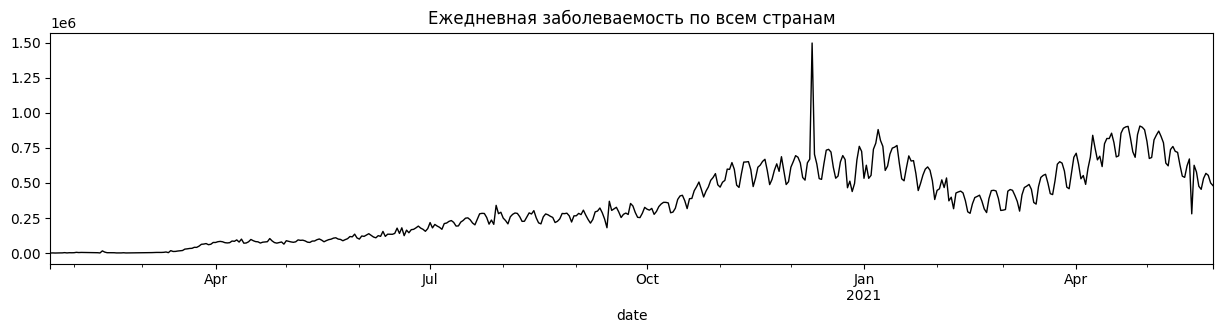

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(15, 3),
    title='Ежедневная заболеваемость по всем странам',
    grid = False,
    color = 'black',
    lw=1
);

In [ ]:
grouped_cases

,daily_confirmed
date,
2020-01-22,0.0
2020-01-23,537.0
2020-01-24,-158.0
2020-01-25,495.0
2020-01-26,680.0
...,...
2021-05-25,531845.0
2021-05-26,568216.0
2021-05-27,554368.0


**Выводы по графику:** на графике отчетливо виден умеренный начальный рост заболеваемости, после чего наблюдается ее резкое повышение в середине октября 2020, а в декабре 2020 года вспышка коронавируса (зафиксировано более 1.4 млн заболевших в день). После чего наблюдается постепенное уменьшение числа ежедневно фиксированных случаев и наступление второй волны в марте 2021. Наконец, начиная с мая 2021 наблюдается очередной спад.

Пилообразность графика - подъемы и спады с периодом в 7 дней - могут быть связаны с рабочими и выходными днями.
Нам неизвестно, как  устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что спад в выходные обусловлен меньшей интенсивностью работы медицинских служб. Также можно предположить, что в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берется/проводится меньше тестов, к понедельнику они еще не готовы и диагноз еще не поставлен. Также можем предположить, что минимум в понедельник может быть запаздыванием подсчета статистики, т.е. на самом деле данные за понедельник - это данные за воскресенье


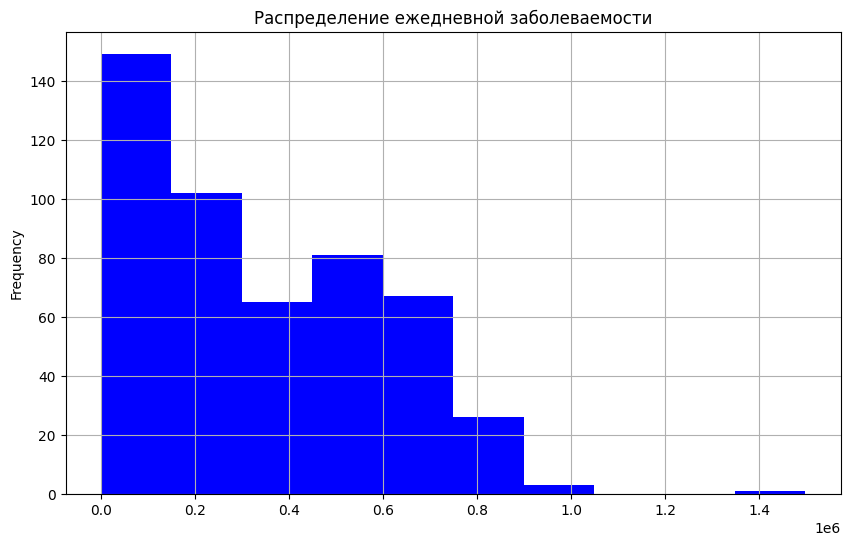

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'blue',
    bins=10
);

**Выводы по графику:** по гистограмме можно судить о частоте попадания ежедневной заболеваемости в определенный интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн. человек), разбитый на 10 равных интервалов. На оси ординат - число наблюдений, попавших в этот интервал.

Во-первых, мы видим модальное значение близ нуля (от 0 до примерно 150 тыс. заболеваний в день), т.е. большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

Во-вторых, в глаза бросается "пенёк", который соответствует резкой вспышке заболеваемости, которую мы видели ранее, его высота очень мала, ведь такое наблюдение единственно. Даже на гистограмме кажется, что данное наблюдение является аномальным и скорее всего является выбросом.

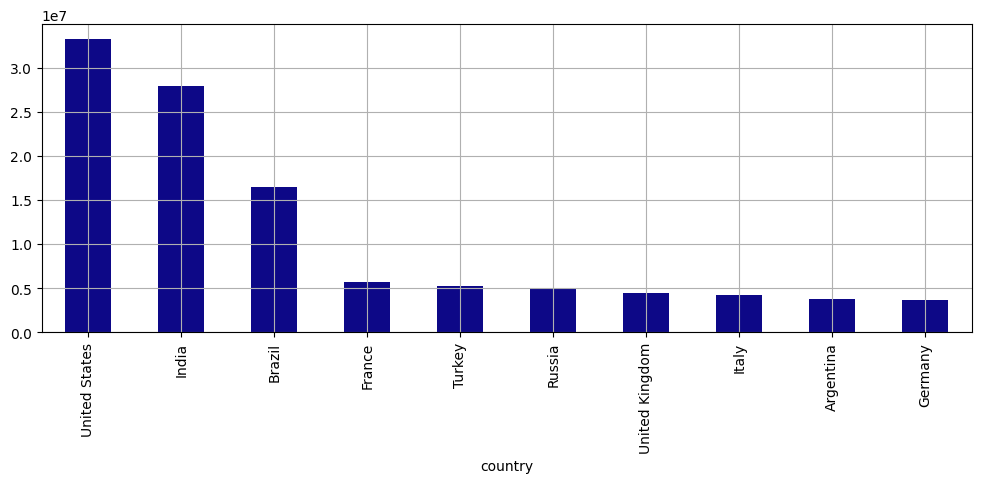

In [ ]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

**Выводы по графику:** на диаграмме видно, что лидерами по числу заболевших являются Соединенные Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаково.

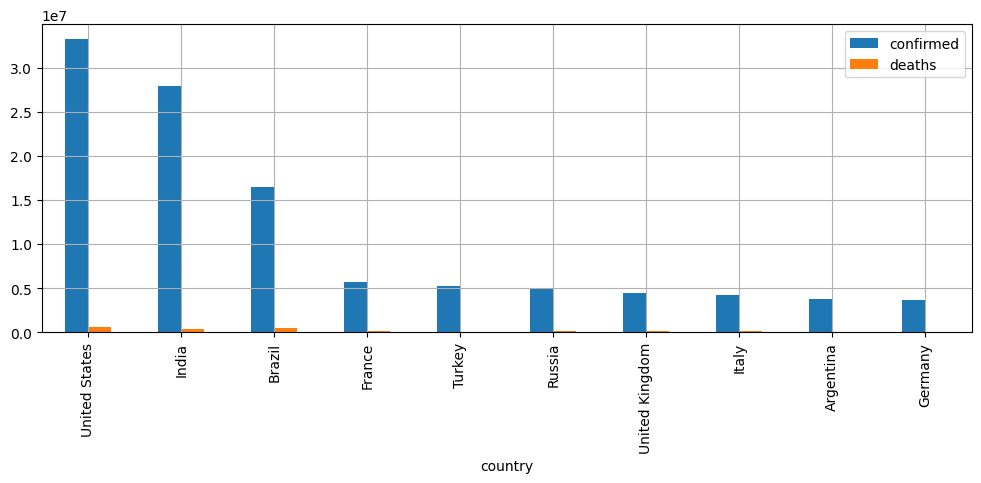

In [ ]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True
);

**Выводы по графику:** график является небольшим усовершенствованием предыдущего. Теперь на графике можно увидеть соотношение числа зафиксированных случаев и смертей.
Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это косвенно может говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие- по клинической картине, учитывающей и другие показатели). Это с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идален).


Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить "здесь и сейчас", не сильно заморачиваясь над их внешним видом. Однако, такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации - довольно ограниченный функционал:
* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации он не подходит
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах
* Сложно или иногда даже невозможно корректировать внешний вид графика
* Отсутствует 3D визуализация


In [ ]:
from IPython.display import Image

In [ ]:
PATH = r"/content/drive/MyDrive/Colab Notebooks/Анализ данных/data" # путь к папке с данными

In [ ]:
from os.path import join

## Задания

1. Постройте график:

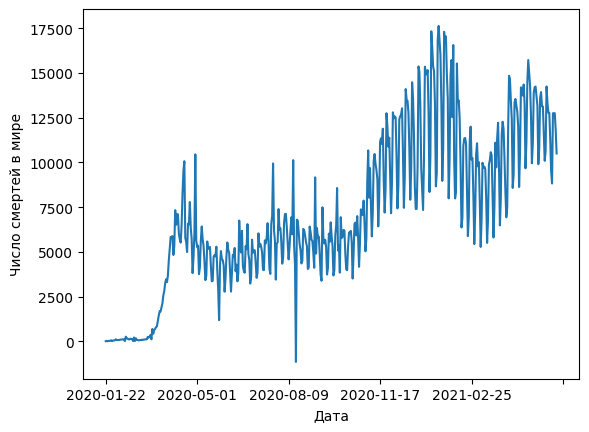

In [ ]:
Image(join(PATH, 'grafic.png'), width=600, height=400)

2. Постройте столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?

Используйте метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить последнее непустое значение в группах.

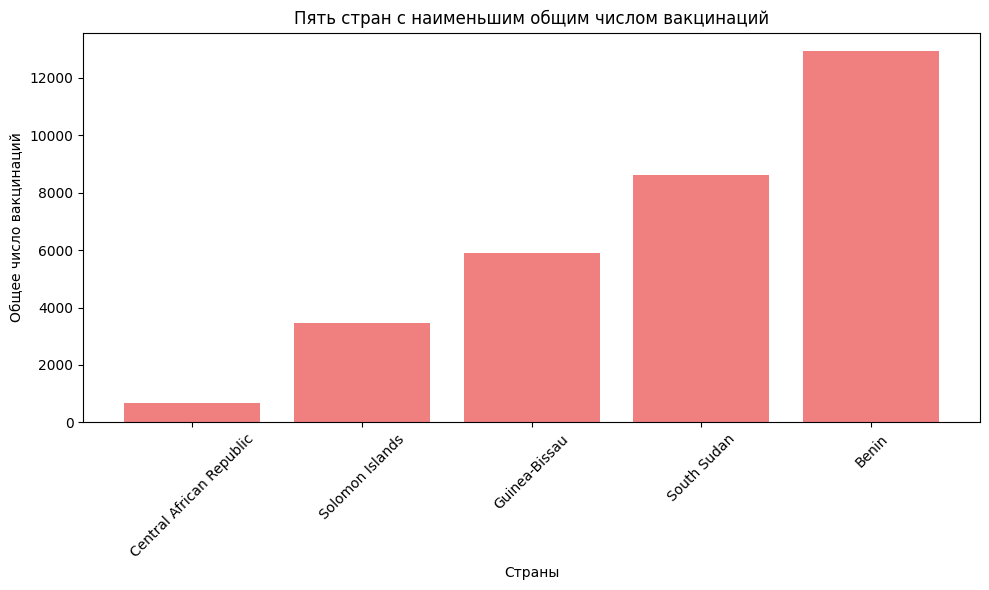

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/covid_df.csv')
last_vaccinations = data.groupby('country')['total_vaccinations'].last().reset_index()
least_vaccinated = last_vaccinations.nsmallest(5, 'total_vaccinations')

plt.figure(figsize=(10, 6))
plt.bar(least_vaccinated['country'], least_vaccinated['total_vaccinations'], color='lightcoral')
plt.title('Пять стран с наименьшим общим числом вакцинаций')
plt.xlabel('Страны')
plt.ylabel('Общее число вакцинаций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Ответьте на вопрос по графику из задания 2: В какой стране число вакцинированных наименьшее?

In [ ]:
country_least_vaccinated = least_vaccinated.loc[least_vaccinated['total_vaccinations'].idxmin(), 'country']
print(f'Страна с наименьшим числом вакцинированных: {country_least_vaccinated}')

Страна с наименьшим числом вакцинированных: Central African Republic


4. Построить график с сортировкой по числу умерших

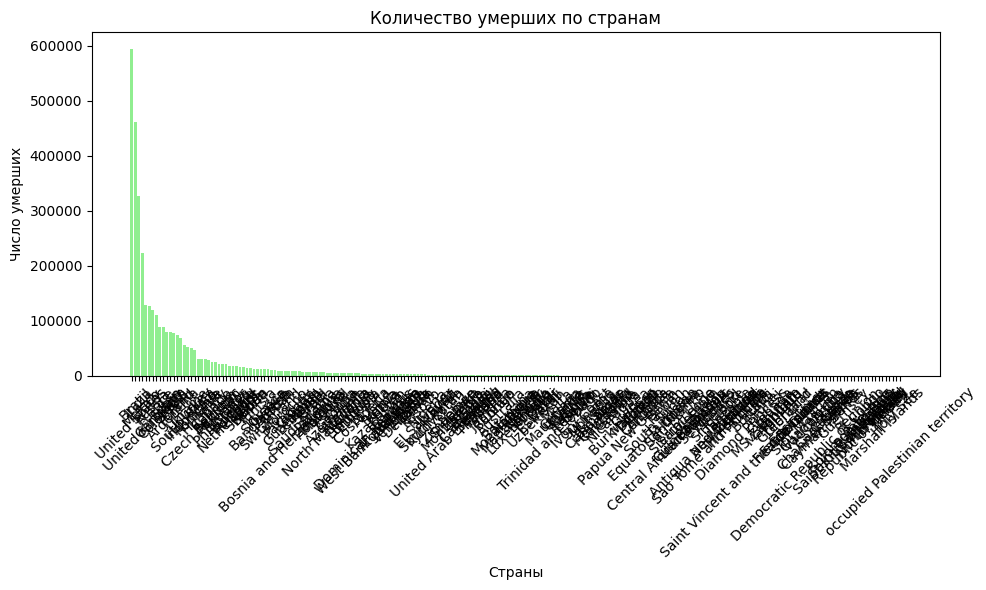

In [ ]:
last_deaths = data.groupby('country')['deaths'].last().reset_index()
sorted_deaths = last_deaths.sort_values(by='deaths', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sorted_deaths['country'], sorted_deaths['deaths'], color='lightgreen')
plt.title('Количество умерших по странам')
plt.xlabel('Страны')
plt.ylabel('Число умерших')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()